# Predicting default of a credit card holder

## Data Description
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Content
There are 25 variables:

<br>**Customer ID**: ID of each client
<br>**Credit_Amount**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
<br>**Gender**: sex (1=male, 2=female)
<br>**Academic_Qualification**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
<br>**Marital**: Marital status (1=married, 2=single, 3=others)
<br>**Age_Years**: Age in years
<br>**Repayment_Status_Jan**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
<br>**Repayment_Status_Feb**: Repayment status in August, 2005 (scale same as above)
<br>**Repayment_Status_March**: Repayment status in July, 2005 (scale same as above)
<br>**Repayment_Status_April**: Repayment status in June, 2005 (scale same as above)
<br>**Repayment_Status_May**: Repayment status in May, 2005 (scale same as above)
<br>**Repayment_Status_June**: Repayment status in April, 2005 (scale same as above)
<br>**Jan_Bill_Amount**: Amount of bill statement in September, 2005 (NT dollar)
<br>**Feb_Bill_Amount**: Amount of bill statement in August, 2005 (NT dollar)
<br>**March_Bill_Amount**: Amount of bill statement in July, 2005 (NT dollar)
<br>**April_Bill_Amount**: Amount of bill statement in June, 2005 (NT dollar)
<br>**May_Bill_Amount**: Amount of bill statement in May, 2005 (NT dollar)
<br>**June_Bill_Amount**: Amount of bill statement in April, 2005 (NT dollar)
<br>**Previous_Payment_Jan**: Amount of previous payment in September, 2005 (NT dollar)
<br>**Previous_Payment_Feb**: Amount of previous payment in August, 2005 (NT dollar)
<br>**Previous_Payment_March**: Amount of previous payment in July, 2005 (NT dollar)
<br>**Previous_Payment_April**: Amount of previous payment in June, 2005 (NT dollar)
<br>**Previous_Payment_May**: Amount of previous payment in May, 2005 (NT dollar)
<br>**Previous_Payment_June**: Amount of previous payment in April, 2005 (NT dollar)
<br>**Default_Payment**: Default payment (1=yes, 0=no)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [0]:
#from google.colab import drive
#drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [3]:
df_credit_card = pd.read_csv('BankCreditCard.csv')

In [4]:
df_credit_card.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


Let's have a look at all the columns present in the dataset

In [5]:
df_credit_card.columns

Index(['Customer ID', 'Credit_Amount', 'Gender', 'Academic_Qualification',
       'Marital', 'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount',
       'May_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan',
       'Previous_Payment_Feb', 'Previous_Payment_March',
       'Previous_Payment_April', 'Previous_Payment_May',
       'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

Let's check data types of each column

In [6]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

Remove "Customer ID" since all the values are unique and does not contribute any information for analysis

In [7]:
#Drop customer id column
df_credit_card.drop('Customer ID', axis=1,inplace=True);

# Exploratory data analysis

Let's have a look at the Default Payment, Gender, Academic Qualification, Marital demographics of the data.

### Default Payment

In [8]:
#counts each category in default payment variable
df_credit_card['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

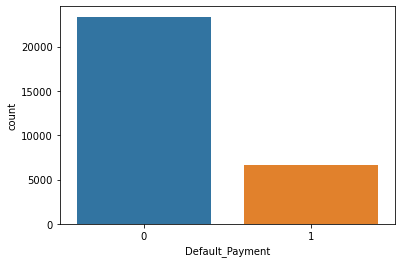

In [9]:
sns.countplot(x='Default_Payment', data=df_credit_card)
plt.show()

23364 observations are 0 where 0 means No and 6636 observations are 1 where 1 means Yes in the target variable

### Gender

In [10]:
df_credit_card['Gender'].value_counts()

2    18112
1    11888
Name: Gender, dtype: int64

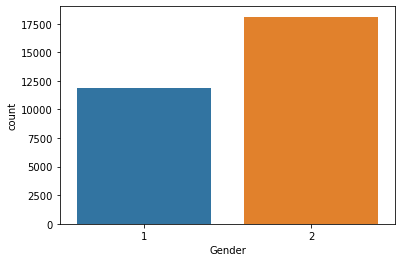

In [11]:
sns.countplot(x='Gender',data=df_credit_card);
plt.show()

The number of female credit card holders are higher than the number of male credit card holders.

There are 11888 male and 18112 female credit card holders.

### Academic Qualification

In [12]:
df_credit_card['Academic_Qualification'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       65
Name: Academic_Qualification, dtype: int64

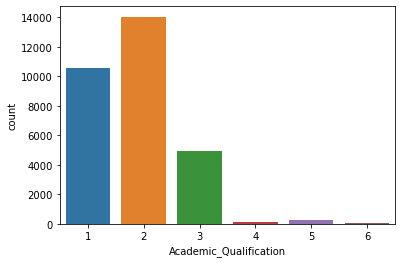

In [13]:
sns.countplot(x='Academic_Qualification',data=df_credit_card)
plt.show()

1=Undergraduate, 2=Graduate, 3=Postgraduate, 4=Professional, 5=Others, 6=Unknown.

The above plot shows most of the credit card holders are students.

### Marital

In [14]:
df_credit_card['Marital'].value_counts()

2    15964
1    13659
3      323
0       54
Name: Marital, dtype: int64

1=Married, 2=Single, 3= Do not prefer to say, 0=no information

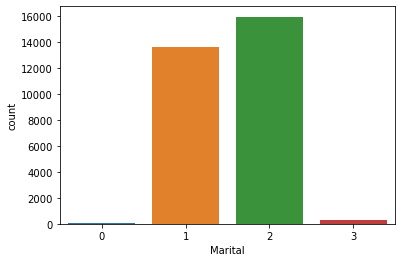

In [15]:
sns.countplot(x='Marital',data=df_credit_card)
plt.show()

From the above plot we can say that most of the credit card holders are 'single', followed by married credit card holders

### Compare "Academic Qualification" with "Default Payment"

Text(0, 0.5, 'Default Payment')

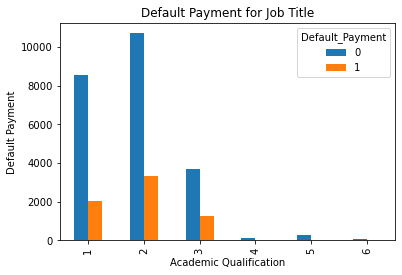

In [16]:
%matplotlib inline
pd.crosstab(df_credit_card.Academic_Qualification,df_credit_card.Default_Payment).plot(kind='bar')
plt.title('Default Payment for Job Title')
plt.xlabel('Academic Qualification')
plt.ylabel('Default Payment')


The above charts shows the default payment status of Undergraduates, graduates and post-graduates. Blue bar shows customers who will not be paying in the next month, whereas orange bar shows payment to be done in the next month.

### Compare "Academic Qualification" and "Marital"

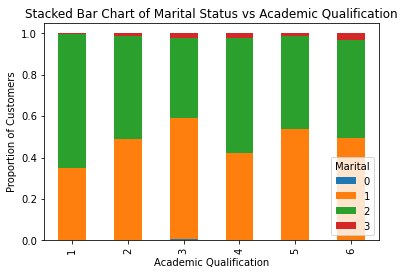

In [17]:
table=pd.crosstab(df_credit_card.Academic_Qualification,df_credit_card.Marital)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Academic Qualification')
plt.xlabel('Academic Qualification')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

**Marital**

1=Married, 2=Single, 3= Do not prefer to say, 0=no information

**Academic Qualification**

1=Undergraduate, 2=Graduate, 3=Postgraduate, 4=Professional, 5=Others, 6=Unknown.

The bars represent the proportional marital status of the credit card holders. The x-axis represents customers with an academic qualification




### Correlation Matrix

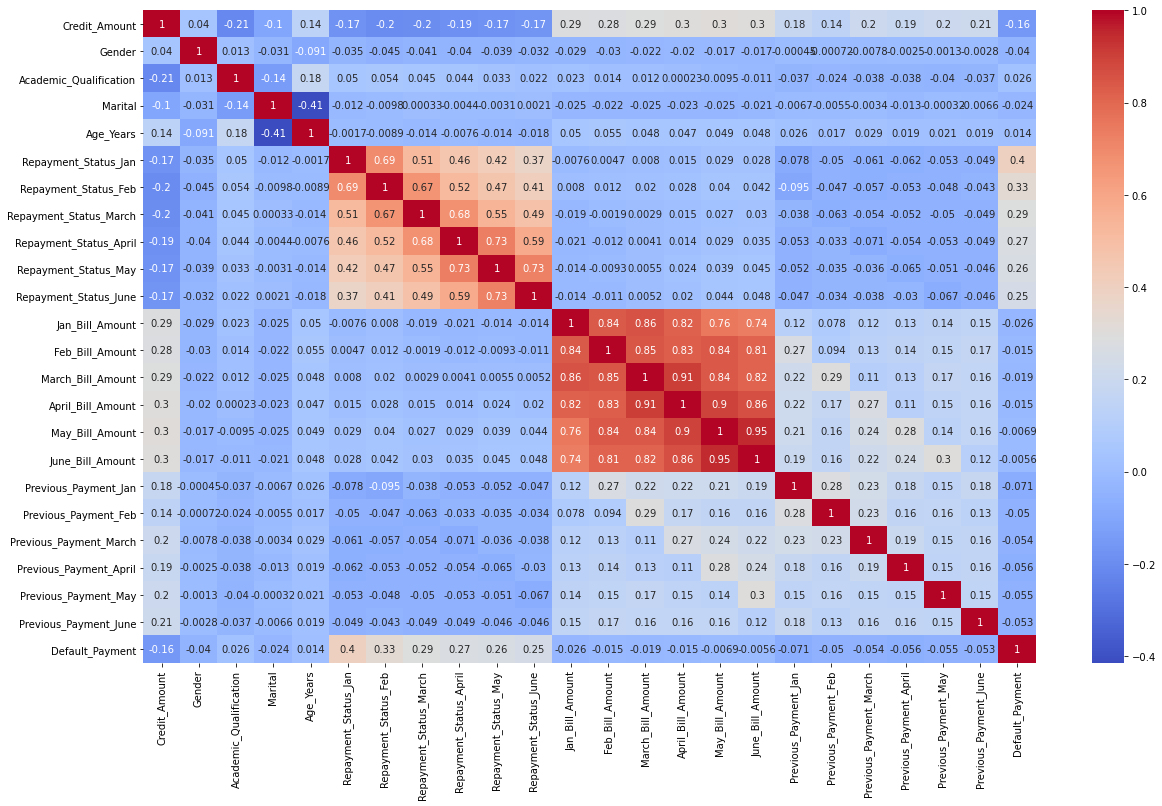

In [18]:
#calculating correlation among numeric variable 
corr_matrix = df_credit_card.corr() 

#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True);

The above result shows all independent variables are slightly correlated with target variable. But independent variables have multicolinearity. For example: "March_Bill_Amount" is highly correlated with "April_Bill_Amount". 

### Filtering the columns based correlation value

In [19]:
#Create empty array
columns = np.full((corr_matrix.shape[0],), True, dtype=bool)

#For loop to filter columns
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
# Selected column store into a variable
selected_columns = df_credit_card.columns[columns]
df_with_filtered_columns = df_credit_card[selected_columns]

In [20]:
df_with_filtered_columns.columns

Index(['Credit_Amount', 'Gender', 'Academic_Qualification', 'Marital',
       'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'May_Bill_Amount',
       'Previous_Payment_Jan', 'Previous_Payment_Feb',
       'Previous_Payment_March', 'Previous_Payment_April',
       'Previous_Payment_May', 'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

In [21]:
df_with_filtered_columns.shape

(30000, 22)

In [22]:
df_credit_card.shape

(30000, 24)

### Splitting the dataset into input and output 

In [23]:
X = df_with_filtered_columns.drop('Default_Payment',axis=1)
y = df_with_filtered_columns.loc[:,'Default_Payment']

In [24]:
X.head()

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,May_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June
0,20000.0,2,2,1,24,2,2,0,0,0,...,3933.0,3103.0,689.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0
1,220000.0,2,2,2,26,0,2,0,0,0,...,3683.0,1735.0,2682.0,3455.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,39339.0,14037.0,23559.0,14848.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,46990.0,48333.0,49292.0,28858.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,0,0,0,0,0,...,8637.0,5570.0,35835.0,18146.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0


In [25]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Default_Payment, dtype: int64

### Standardizing input variables


In [26]:
from sklearn.preprocessing import StandardScaler  

# standardized the dataset
sc_x = StandardScaler()    
X_std = sc_x.fit_transform(X)

In [27]:
X_std

array([[-1.30714215,  0.81016074,  0.18135662, ..., -0.29980379,
        -0.30967814, -0.29338206],
       [ 0.20472737,  0.81016074,  0.18135662, ..., -0.24133615,
        -0.30967814, -0.18087821],
       [-0.77798782,  0.81016074,  0.18135662, ..., -0.24133615,
        -0.2508173 , -0.01212243],
       ...,
       [-1.23154867, -1.23432296,  0.18135662, ..., -0.04839293,
        -0.13309562, -0.11900109],
       [-0.85358129, -1.23432296,  1.4401948 , ..., -0.1866689 ,
         2.86674716, -0.19190359],
       [-1.08036172, -1.23432296,  0.18135662, ..., -0.24133615,
        -0.2508173 , -0.23713013]])

# Implementing support vector classifier

### Splitting input data into training dataset and testing dataset

In [29]:
#import train and test split module from sklearn
from sklearn.model_selection import train_test_split

#split train and test datset
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0, stratify=y)

## Linear Kernel


###  Create the support vector classifier model 

In [30]:
from sklearn.svm import SVC # "Support vector classifier"

In [30]:
#help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [31]:
linear_svc = SVC(kernel='linear', C=1.0,random_state=42)

### Training the model

In [32]:
linear_svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [33]:
linear_svc.n_support_

array([4698, 4312])

In [34]:
linear_svc.support_vectors_

array([[ 0.35591432,  0.81016074, -1.07748156, ..., -0.29980379,
        -0.11149369, -0.12046364],
       [ 0.4315078 ,  0.81016074, -1.07748156, ..., -0.29980379,
        -0.30967814, -0.29338206],
       [-1.23154867,  0.81016074,  0.18135662, ..., -0.24145308,
        -0.13309562, -0.12462628],
       ...,
       [-1.08036172,  0.81016074, -1.07748156, ..., -0.27056997,
        -0.28024772, -0.29338206],
       [ 0.05354042, -1.23432296, -1.07748156, ..., -0.00746558,
        -0.13309562, -0.29338206],
       [-0.77798782, -1.23432296,  1.4401948 , ..., -0.29980379,
        -0.30967814, -0.29338206]])

### Making Predictions


In [35]:
linear_svc_pred_test =linear_svc.predict(X_test)

In [36]:
print('Accuracy of support vector classifier on train set: {:.5f}'.format(linear_svc.score(X_train, y_train)))

Accuracy of support vector classifier on train set: 0.82071


In [37]:
print('Accuracy of support vector classifier on test set: {:.5f}'.format(linear_svc.score(X_test, y_test)))

Accuracy of support vector classifier on test set: 0.82067


### Evaluating the Algorithm


### Confusion matrix

In [38]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, linear_svc_pred_test)
print(confusion_matrix)

[[6643  366]
 [1248  743]]


### Classification report

In [39]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, linear_svc_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.37      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

NameError: name 'thresholds' is not defined

### ROC Curve

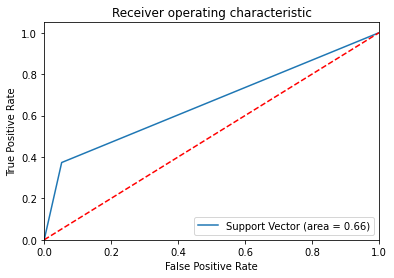

In [41]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Prediction on test data based on the number of thresholds and calculate the false positive rate and true positive rate.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,linear_svc_pred_test)

roc_auc = auc(false_positive_rate, true_positive_rate)

# create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Support Vector (area = %0.2f)' % roc_auc)

#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')

#x-axis limitation
plt.xlim([0.0, 1.0])

#y-axis limitaion
plt.ylim([0.0, 1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver operating characteristic')

#print legend on lower right
plt.legend(loc="lower right")

#save the plot as a image
plt.savefig('Log_ROC')
#print the plot
plt.show()

Roc curve is a plot of true positive rate versus false positive rate. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The area under the curve (AUC) is a measure of test accuracy. When AUC is 0.66, it means there is 66% chance that model will be able to distinguish between positive class and negative class

## Radial Basis Function Kernel

In [42]:
#SVC with RBF kernel
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=1.0)


In [43]:
rbf_svc.fit(X_train,y_train)

SVC(gamma=0.7)

In [44]:
rbf_svc.n_support_

array([9410, 4459])

In [45]:
rbf_svc.support_vectors_

array([[ 1.26303604e+00,  8.10160740e-01,  1.81356620e-01, ...,
         2.18804189e-01, -1.31329791e-01,  1.22783874e+00],
       [ 3.55914324e-01,  8.10160740e-01, -1.07748156e+00, ...,
        -2.99803790e-01, -1.11493688e-01, -1.20463641e-01],
       [ 5.07101276e-01,  8.10160740e-01, -1.07748156e+00, ...,
         4.46875858e+00,  1.92196427e+01,  2.69249693e-01],
       ...,
       [-1.08036172e+00,  8.10160740e-01, -1.07748156e+00, ...,
        -2.70569970e-01, -2.80247720e-01, -2.93382058e-01],
       [ 5.35404199e-02, -1.23432296e+00, -1.07748156e+00, ...,
        -7.46558307e-03, -1.33095616e-01, -2.93382058e-01],
       [-7.77987816e-01, -1.23432296e+00,  1.44019480e+00, ...,
        -2.99803790e-01, -3.09678140e-01, -2.93382058e-01]])

### Making Predictions


In [46]:
pred_test = rbf_svc.predict(X_test)

In [47]:
print('Accuracy of support vector classifier on train set: {:.5f}'.format(rbf_svc.score(X_train, y_train)))

Accuracy of support vector classifier on train set: 0.88486


In [48]:
print('Accuracy of support vector classifier on test set: {:.5f}'.format(rbf_svc.score(X_test, y_test)))

Accuracy of support vector classifier on test set: 0.79700


### Evaluating the Algorithm


### Cross validation

In [49]:
from sklearn import model_selection
#import cross validation score model from sklearn
from sklearn.model_selection import cross_val_score

#creat a logistic regression model with SGD
modelCV = SVC(kernel='rbf', gamma=0.7, C=1.0)

#call cross_val_score
results = model_selection.cross_val_score(modelCV, X_std, y, cv=10 , scoring='accuracy')
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
print(results)

10-fold cross validation average accuracy: 0.800
[0.788      0.799      0.79333333 0.79       0.80033333 0.805
 0.812      0.802      0.81133333 0.80066667]


### Confusion matrix

In [50]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, pred_test)
print(confusion_matrix)

[[6799  210]
 [1617  374]]


True Negative is 6799 that means 6799 observations are correctly predicted as 0.

False Positive is 210 that means 210 observations are wrongly predicted as 1.

False Negative is 1617 that means  1617 observations are wronly predicted as 0.

True Positive is 374 that 374 observations are correctly predicted as 1.


### Classification report

In [51]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7009
           1       0.64      0.19      0.29      1991

    accuracy                           0.80      9000
   macro avg       0.72      0.58      0.59      9000
weighted avg       0.77      0.80      0.75      9000



#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.



## Let's learn about hyperparameters for  SVM

### C 
It is the regularization parameter, C, of the error term.


### kernel 
It specifies the kernel type to be used in the algorithm. It can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, or a callable. The default value is ‘rbf’.

### degree 
 It is the degree of the polynomial kernel function (‘poly’) and is ignored by all other kernels. The default value is 3.

### gamma 
 It is the kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’. If gamma is ‘auto’, then 1/n_features will be used instead.

### coef0 
Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

### shrinking 
Whether to use the shrinking heuristic.

### probability 
Whether to enable probability estimates. This must be enabled prior to calling fit, and will slow down that method.

### tol 
Tolerance for stopping criterion.

### cache_size 
Specify the size of the kernel cache (in MB).

### class_weight 
Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

### verbose 
Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context.

### max_iter
Hard limit on iterations within solver, or -1 for no limit.

### decision_function_shape 
Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy.



### Training the model with grid search

In [52]:
from sklearn.model_selection import GridSearchCV


In [53]:
model_grid_search = SVC(kernel='rbf')

In [54]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10],
              "gamma": [0.0001, 0.001, 0.01, 0.1, 1],
              }


### Create a model with grid search

In [55]:
# ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

#create grid search object
grid_search = GridSearchCV(model_grid_search, param_grid=param_grid)

grid_search.fit(X_train, y_train);

### Print best parameter values 

In [0]:
# View the accuracy score
print('Best score for data1:', grid_search.best_score_) 

Best score for data1: 0.821047619047619


In [0]:
# View the best parameters for the model found using grid search
print('Best C:',grid_search.best_estimator_.C) 
print('Best n_iter:',grid_search.best_estimator_.gamma)


Best C: 10
Best n_iter: 0.001


###  Build a model using best parameters


In [0]:
model_grid = SVC(kernel='rbf', C=10, gamma=0.001)

### Training the model

In [0]:
# ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

model_grid.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Making Predictions

In [0]:
pred_test = model_grid.predict(X_test)

In [0]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(model_grid.score(X_train, y_train)))

Accuracy of support vector classifier on test set: 0.82


In [0]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(model_grid.score(X_test, y_test)))

Accuracy of support vector classifier on test set: 0.82


### Evaluating the Algorithm


### Confusion matrix

In [0]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, pred_test)
print(confusion_matrix)

[[6703  306]
 [1304  687]]


True Negative is 6703 that means 6703 observations are correctly predicted as 0.

False Positive is 306 that means 306 observations are wrongly predicted as 1.

False Negative is 1304 that means  1304 observations are wronly predicted as 0.

True Positive is 687 that 687 observations are correctly predicted as 1.

### Classification report

In [0]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7009
           1       0.69      0.35      0.46      1991

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.




### ROC curve 

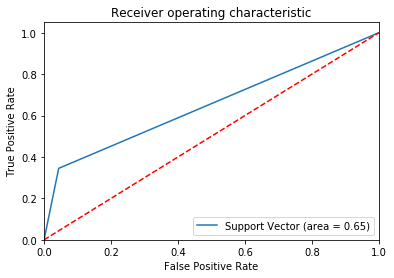

In [0]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Prediction on test data based on the number of thresholds and calculate the false positive rate and true positive rate.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_test)

roc_auc = auc(false_positive_rate, true_positive_rate)

# create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Support Vector (area = %0.2f)' % roc_auc)

#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')

#x-axis limitation
plt.xlim([0.0, 1.0])

#y-axis limitaion
plt.ylim([0.0, 1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver operating characteristic')

#print legend on lower right
plt.legend(loc="lower right")

#save the plot as a image
plt.savefig('Log_ROC')
#print the plot
plt.show()

Roc curve is a plot of true positive rate versus false positive rate. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The area under the curve (AUC) is a measure of test accuracy. When AUC is 0.65, it means there is 65% chance that model will be able to distinguish between positive class and negative class



# Polynomial Kernel

In [0]:
# SVC with polynomial (degree 3) kernel
poly_svc = SVC(kernel='poly', degree=3, C=1.0)

In [0]:
# ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

poly_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Making Predictions


In [0]:
pred_test = poly_svc.predict(X_test)

In [0]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(poly_svc.score(X_train, y_train)))

Accuracy of support vector classifier on test set: 0.83


In [0]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(poly_svc.score(X_test, y_test)))

Accuracy of support vector classifier on test set: 0.81


### Evaluating the Algorithm


### Confusion matrix

In [0]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, pred_test)
print(confusion_matrix)

[[6688  321]
 [1363  628]]


True Negative is 6688 that means 6688 observations are correctly predicted as 0.

False Positive is 321 that means 321 observations are wrongly predicted as 1.

False Negative is 1363 that means  1363 observations are wronly predicted as 0.

True Positive is 628 that 628 observations are correctly predicted as 1.

### Classification report

In [0]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7009
           1       0.66      0.32      0.43      1991

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.75      0.63      0.66      9000
weighted avg       0.79      0.81      0.79      9000



#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

### ROC Curve

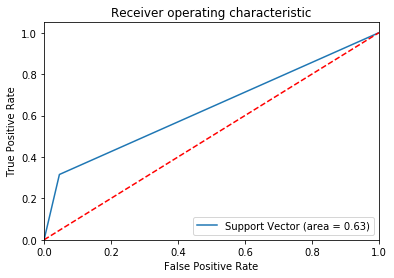

In [0]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Prediction on test data based on the number of thresholds and calculate the false positive rate and true positive rate.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_test)

roc_auc = auc(false_positive_rate, true_positive_rate)

# create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Support Vector (area = %0.2f)' % roc_auc)

#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')

#x-axis limitation
plt.xlim([0.0, 1.0])

#y-axis limitaion
plt.ylim([0.0, 1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver operating characteristic')

#print legend on lower right
plt.legend(loc="lower right")

#save the plot as a image
plt.savefig('Log_ROC')
#print the plot
plt.show()

Roc curve is a plot of true positive rate versus false positive rate. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The area under the curve (AUC) is a measure of test accuracy. When AUC is 0.63, it means there is 63% chance that model will be able to distinguish between positive class and negative class

## Conclusion

In [2]:
import pandas as pd

df_accuracy= pd.DataFrame({"Linear Kernel":{"Accuracy on training data":"82%","Accuracy on testing data":"82%","F1 Score for 'No'":"89%","F1 Score for 'Yes'":"47%","AUC Score":"66%"},
                  "RBF Kernel with grid search":{"Accuracy on training data":"82%","Accuracy on testing data":"82%","F1 Score for 'No'":"89%","F1 Score for 'Yes'":"46%","AUC Score":"65%"},
                  "Polynomial Kernel":{"Accuracy on training data":"83%","Accuracy on testing data":"81%","F1 Score for 'No'":"89%","F1 Score for 'Yes'":"43%","AUC Score":"63%"}})

In [3]:
df_accuracy = df_accuracy.reindex(["Accuracy on training data", "Accuracy on testing data", "AUC Score", "F1 Score for 'No'","F1 Score for 'Yes'"])
df_accuracy

,Linear Kernel,Polynomial Kernel,RBF Kernel with grid search
Accuracy on training data,82%,83%,82%
Accuracy on testing data,82%,81%,82%
AUC Score,66%,63%,65%
F1 Score for 'No',89%,89%,89%
F1 Score for 'Yes',47%,43%,46%
